The purpose of this notebook is to explore the data

# 1. Load and import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DF_PATH = './../Data/Dataframes/'

eulogies = pd.read_csv(DF_PATH + 'eulogies.csv')
sec = pd.read_csv(DF_PATH + 'sec_perp.csv')

In [3]:
eulogies.head()

,Savant,Auteur,Annee,Eloge
0,Bougainville,Delambre,1813.0,"Louis-Antoine de Bougainville, sénateur, comte..."
1,Maskelyne,Delambre,1813.0,"Névil Maskelyne, docteur en théologie, membre ..."
2,Desessarts,Cuvier,1812.0,"Jean-Charles Desessarts, médecin, membre de l'..."
3,Cavendish,Cuvier,1812.0,Parmi les hommes que nous avons coutume de cél...
4,Malus,Delambre,1812.0,"Sur la vie et les ouvrages de m-, et de m. Le ..."


In [4]:
sec.head()

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree
0,Mairan,1741,1743,0.0,0.0,2.0
1,Fouchy,1743,1776,0.0,0.0,33.0
2,Condorcet,1776,1793,0.0,0.0,17.0
3,Prony,1796,1798,0.0,0.0,2.0
4,Lefevre-Gineau,1798,1800,0.0,0.0,2.0


# 2. Exploring the dataset

In [5]:
print("Number of eulogies : " + str(eulogies.shape[0]))

Number of eulogies : 257


## a. By year

In [6]:
print("First year of publication : " + str(int(min(eulogies.Annee))))
print("Last year of publication : " + str(int(max(eulogies.Annee))))

First year of publication : 1741
Last year of publication : 1943


In [7]:
eulogies['Annee'].value_counts()

1773.0    25
1743.0     6
1812.0     6
1777.0     5
1784.0     5
          ..
1874.0     1
1887.0     1
1754.0     1
1746.0     1
1919.0     1
Name: Annee, Length: 143, dtype: int64

In [8]:
print('The author the year with the most publications is : ' + 
      eulogies[eulogies['Annee']==1773].loc[33, 'Auteur'])


The author the year with the most publications is : Condorcet


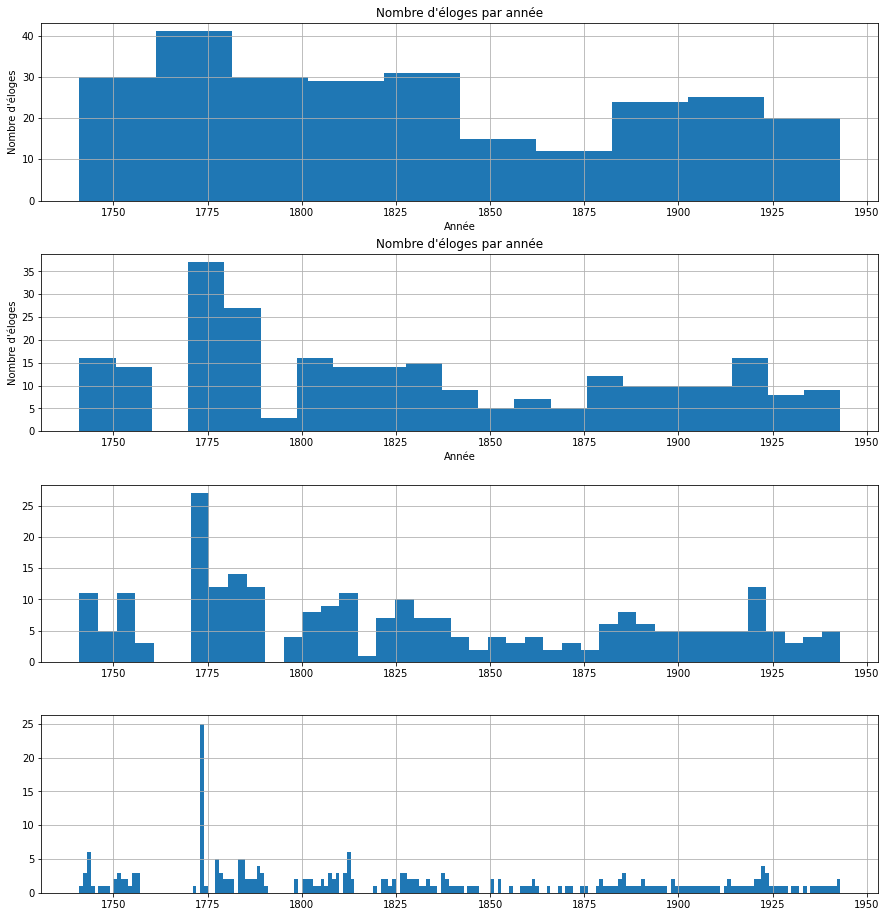

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize = (15,16))

nbins = int((max(eulogies.Annee)-min(eulogies.Annee))/10) + 1
nbins_5ann = int((max(eulogies.Annee)-min(eulogies.Annee))/5) + 1


nbins_ann = int((max(eulogies.Annee)-min(eulogies.Annee))) 
#df['Annee'].hist(bins = nbins)
eulogies['Annee'].hist(ax = axes[0])
eulogies['Annee'].hist(bins = nbins, ax = axes[1])
eulogies['Annee'].hist(bins = nbins_5ann, ax = axes[2])
eulogies['Annee'].hist(bins = nbins_ann, ax = axes[3])

for i in range(2):
    axes[i].set_title("Nombre d'éloges par année")
    axes[i].set_xlabel('Année')
    axes[i].set_ylabel("Nombre d'éloges")

plt.subplots_adjust(hspace = 0.3)

In [10]:
df_fouchy = eulogies[eulogies['Auteur']=='Fouchy']
print('Première éloge :' + str(min(df_fouchy['Annee'])))
print('Dernière éloge :' + str(max(df_fouchy['Annee'])))

Première éloge :1744.0
Dernière éloge :1756.0


In [11]:
eulogies[eulogies['Savant']=='de Fontenelle']

,Savant,Auteur,Annee,Eloge


## b. By author

In [12]:
print("Number of different authors : " + str(eulogies['Auteur'].nunique()))

Number of different authors : 31


Text(0, 0.5, 'Number of eulogies')

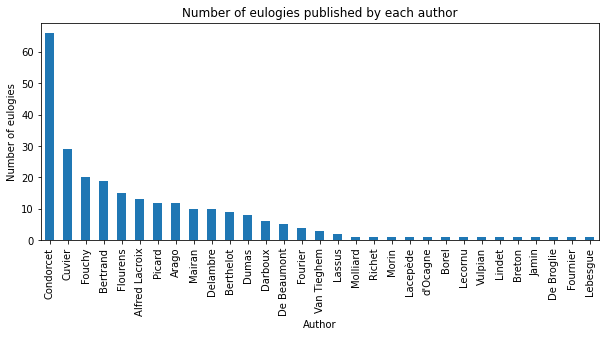

In [13]:
eulogies['Auteur'].value_counts().plot(kind = 'bar', figsize = (10, 4))
plt.title('Number of eulogies published by each author')
plt.xlabel('Author')
plt.ylabel('Number of eulogies')

In [15]:
print('Condorcet was Secretary for ' + str(int(sec.loc[2, 'Duree'])) + ' years')
print('Cuvier was Secretary for ' + str(int(sec.loc[20, 'Duree'])) + ' years')
print('Fouchy was Secretary for ' + str(int(sec.loc[1, 'Duree'])) + ' years')


Condorcet was Secretary for 17 years
Cuvier was Secretary for 31 years
Fouchy was Secretary for 33 years


In [17]:
sec = sec[sec['Début']<=1943]
sec = sec[sec['Fin']>1740]

Text(0, 0.5, "Nombre d'année")

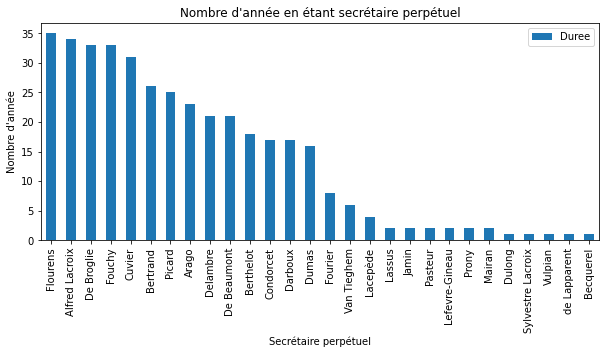

In [18]:
sec.sort_values(by='Duree', ascending = False, inplace = True)

sec.plot(x = 'Name', y = 'Duree', kind = 'bar', figsize = (10,4))
plt.title("Nombre d'année en étant secrétaire perpétuel")
plt.xlabel("Secrétaire perpétuel")
plt.ylabel("Nombre d'année")

In [19]:
#Checking if the author is a secretary

eulogies['Sec'] = eulogies['Auteur'].apply(lambda x : x in sec.Name.unique())

Looking for the eulogies that were not written by secretaries

In [20]:
eulogies[eulogies['Sec']==False]

,Savant,Auteur,Annee,Eloge,Sec
73,Bonnier,Molliard,1923.0,"\n Bonnier (Gaston- Eugène-Marie), né à Paris ...",False
88,Piobert,Morin,1871.0,"\n\tMessieurs, \n\tC'est ordinairement aux Sec...",False
131,Schloesing,Lindet,1920.0,\n La belle carrière scientifique de J.- J.-Th...,False
133,Guyou,Fournier,1921.0,"\n I. \t \n Emile Guyou est né, le 25 novembre...",False
134,Humbert,Borel,1922.0,\n I. \t \n Georges Humbert est né à Paris le ...,False
135,Carpentier,d'Ocagne,1922.0,"\n Il serait, sans doute, possible de caractér...",False
136,Carnot,Breton,1922.0,"\n Adolphe Carnot, dont le nom, la famille se ...",False
137,Jordan,Lebesgue,1923.0,"\n La section de Géométrie vient, à deux repri...",False
181,Maurice Levy,Lecornu,1915.0,"\n Je ne saurais, dans les circonstances actue...",False
182,Lucas-Championnière,Richet,1913.0,\n Le grand-père de Lucas-Championnière fut un...,False


- Molliard : https://fr.wikipedia.org/wiki/Marin_Molliard membre de l'Académie des Sciences, botaniste
- Morin : https://fr.wikipedia.org/wiki/Arthur_Morin membre de l'Académie des Sciences, physicien
- Lindet : https://www.yumpu.com/fr/document/view/17144116/leon-lindet-academie-des-sciences
- Fournier : https://fr.wikipedia.org/wiki/Joseph-Xavier_Fournier
- Borel :
- d'Ocagne :
- Breton :
- Lebesgue :
- Lecornu :
- Richet : 

In [21]:
df = eulogies[eulogies['Sec']]
df

,Savant,Auteur,Annee,Eloge,Sec
0,Bougainville,Delambre,1813.0,"Louis-Antoine de Bougainville, sénateur, comte...",True
1,Maskelyne,Delambre,1813.0,"Névil Maskelyne, docteur en théologie, membre ...",True
2,Desessarts,Cuvier,1812.0,"Jean-Charles Desessarts, médecin, membre de l'...",True
3,Cavendish,Cuvier,1812.0,Parmi les hommes que nous avons coutume de cél...,True
4,Malus,Delambre,1812.0,"Sur la vie et les ouvrages de m-, et de m. Le ...",True
...,...,...,...,...,...
252,Fresnel,Arago,1830.0,"Messieurs, "" il est des hommes à qui l'on succ...",True
253,Ampère,Arago,1839.0,"Messieurs, je dois aujourd'hui, conformément à...",True
254,Poisson,Arago,1850.0,Naissance de Poisson. - Sa jeunesse.- son admi...,True
255,Gay-Lussac,Arago,1852.0,La biographie dont je vais donner lecture est ...,True


In [22]:
eul_sec = eulogies.merge(sec, how = 'left', left_on = 'Auteur', right_on = 'Name')
eul_sec.head()

,Savant,Auteur,Annee,Eloge,Sec,Name,Début,Fin,Aux_Début,Aux_Fin,Duree
0,Bougainville,Delambre,1813.0,"Louis-Antoine de Bougainville, sénateur, comte...",True,Delambre,1800.0,1802.0,1803.0,1822.0,21.0
1,Maskelyne,Delambre,1813.0,"Névil Maskelyne, docteur en théologie, membre ...",True,Delambre,1800.0,1802.0,1803.0,1822.0,21.0
2,Desessarts,Cuvier,1812.0,"Jean-Charles Desessarts, médecin, membre de l'...",True,Cuvier,1799.0,1801.0,1803.0,1832.0,31.0
3,Cavendish,Cuvier,1812.0,Parmi les hommes que nous avons coutume de cél...,True,Cuvier,1799.0,1801.0,1803.0,1832.0,31.0
4,Malus,Delambre,1812.0,"Sur la vie et les ouvrages de m-, et de m. Le ...",True,Delambre,1800.0,1802.0,1803.0,1822.0,21.0


In [23]:
count = pd.DataFrame(eulogies.Auteur.value_counts()).reset_index()
count

,index,Auteur
0,Condorcet,66
1,Cuvier,29
2,Fouchy,20
3,Bertrand,19
4,Flourens,15
5,Alfred Lacroix,13
6,Picard,12
7,Arago,12
8,Mairan,10
9,Delambre,10


In [24]:
sec = sec.merge(count, how='left', left_on = 'Name', right_on = 'index')
sec

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur
0,Flourens,1833,1868,0.0,0.0,35.0,Flourens,15.0
1,Alfred Lacroix,1914,1948,0.0,0.0,34.0,Alfred Lacroix,13.0
2,De Broglie,1942,1975,0.0,0.0,33.0,De Broglie,1.0
3,Fouchy,1743,1776,0.0,0.0,33.0,Fouchy,20.0
4,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,29.0
5,Bertrand,1874,1900,0.0,0.0,26.0,Bertrand,19.0
6,Picard,1917,1942,0.0,0.0,25.0,Picard,12.0
7,Arago,1830,1853,0.0,0.0,23.0,Arago,12.0
8,Delambre,1800,1802,1803.0,1822.0,21.0,Delambre,10.0
9,De Beaumont,1853,1874,0.0,0.0,21.0,De Beaumont,5.0


In [25]:
sec['nbr_per_year'] = sec.apply(lambda row : row['Auteur']/row['Duree'], axis = 1)
sec

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year
0,Flourens,1833,1868,0.0,0.0,35.0,Flourens,15.0,0.428571
1,Alfred Lacroix,1914,1948,0.0,0.0,34.0,Alfred Lacroix,13.0,0.382353
2,De Broglie,1942,1975,0.0,0.0,33.0,De Broglie,1.0,0.030303
3,Fouchy,1743,1776,0.0,0.0,33.0,Fouchy,20.0,0.606061
4,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,29.0,0.935484
5,Bertrand,1874,1900,0.0,0.0,26.0,Bertrand,19.0,0.730769
6,Picard,1917,1942,0.0,0.0,25.0,Picard,12.0,0.480000
7,Arago,1830,1853,0.0,0.0,23.0,Arago,12.0,0.521739
8,Delambre,1800,1802,1803.0,1822.0,21.0,Delambre,10.0,0.476190
9,De Beaumont,1853,1874,0.0,0.0,21.0,De Beaumont,5.0,0.238095


In [26]:
#sec['Name'].fillna(sec['index'], inplace = True)
sec['index'].fillna(sec['Name'], inplace = True)
sec['Auteur'].fillna(0, inplace = True)
sec['nbr_per_year'].fillna(0, inplace = True)
sec

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year
0,Flourens,1833,1868,0.0,0.0,35.0,Flourens,15.0,0.428571
1,Alfred Lacroix,1914,1948,0.0,0.0,34.0,Alfred Lacroix,13.0,0.382353
2,De Broglie,1942,1975,0.0,0.0,33.0,De Broglie,1.0,0.030303
3,Fouchy,1743,1776,0.0,0.0,33.0,Fouchy,20.0,0.606061
4,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,29.0,0.935484
5,Bertrand,1874,1900,0.0,0.0,26.0,Bertrand,19.0,0.730769
6,Picard,1917,1942,0.0,0.0,25.0,Picard,12.0,0.480000
7,Arago,1830,1853,0.0,0.0,23.0,Arago,12.0,0.521739
8,Delambre,1800,1802,1803.0,1822.0,21.0,Delambre,10.0,0.476190
9,De Beaumont,1853,1874,0.0,0.0,21.0,De Beaumont,5.0,0.238095


Text(0, 0.5, "Ratio du nombre d'éloges écrites par an")

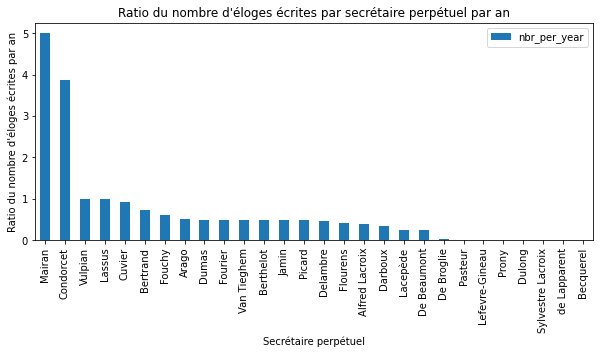

In [42]:
sec.sort_values(by='nbr_per_year', ascending = False, inplace = True)
sec.plot(x ='Name', y ='nbr_per_year', kind = 'bar', figsize=(10,4))
plt.title("Ratio du nombre d'éloges écrites par secrétaire perpétuel par an")
plt.xlabel("Secrétaire perpétuel")
plt.ylabel("Ratio du nombre d'éloges écrites par an")

In [40]:
def with_1943(row):
    if row['Début'] > 1943 :
        return np.nan
    elif row['Fin'] > 1943 :
        return 1943 - row['Début']
    else :
        return row['Duree']

sec['with_1943'] = sec.apply(lambda row : with_1943(row), axis=1)
sec['new_nbr'] = sec.apply(lambda row : row['Auteur']/row['with_1943'], axis = 1)

sec

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year,has_eulogy,with_1943,new_nbr
22,Mairan,1741,1743,0.0,0.0,2.0,Mairan,10.0,5.000000,False,2.0,5.000000
11,Condorcet,1776,1793,0.0,0.0,17.0,Condorcet,66.0,3.882353,True,17.0,3.882353
25,Vulpian,1886,1887,0.0,0.0,1.0,Vulpian,1.0,1.000000,False,1.0,1.000000
17,Lassus,1797,1799,0.0,0.0,2.0,Lassus,2.0,1.000000,True,2.0,1.000000
4,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,29.0,0.935484,True,31.0,0.935484
5,Bertrand,1874,1900,0.0,0.0,26.0,Bertrand,19.0,0.730769,True,26.0,0.730769
3,Fouchy,1743,1776,0.0,0.0,33.0,Fouchy,20.0,0.606061,True,33.0,0.606061
7,Arago,1830,1853,0.0,0.0,23.0,Arago,12.0,0.521739,True,23.0,0.521739
14,Fourier,1822,1830,0.0,0.0,8.0,Fourier,4.0,0.500000,True,8.0,0.500000
15,Van Tieghem,1908,1914,0.0,0.0,6.0,Van Tieghem,3.0,0.500000,False,6.0,0.500000


Text(0, 0.5, "Ratio du nombre d'éloges écrites par an")

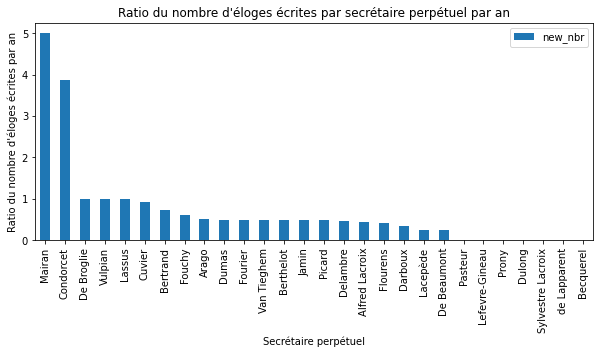

In [43]:
sec.sort_values(by='new_nbr', ascending = False, inplace = True)
sec.plot(x ='Name', y ='new_nbr', kind = 'bar', figsize=(10,4))

plt.title("Ratio du nombre d'éloges écrites par secrétaire perpétuel par an")
plt.xlabel("Secrétaire perpétuel")
plt.ylabel("Ratio du nombre d'éloges écrites par an")

In [36]:
# Vérifier que tous les secrétaires ont une éloge

sec['has_eulogy'] = sec['Name'].apply(lambda x : x in eulogies.Savant.unique())
sec

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year,has_eulogy
22,Mairan,1741,1743,0.0,0.0,2.0,Mairan,10.0,5.000000,False
11,Condorcet,1776,1793,0.0,0.0,17.0,Condorcet,66.0,3.882353,True
25,Vulpian,1886,1887,0.0,0.0,1.0,Vulpian,1.0,1.000000,False
17,Lassus,1797,1799,0.0,0.0,2.0,Lassus,2.0,1.000000,True
4,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,29.0,0.935484,True
5,Bertrand,1874,1900,0.0,0.0,26.0,Bertrand,19.0,0.730769,True
3,Fouchy,1743,1776,0.0,0.0,33.0,Fouchy,20.0,0.606061,True
7,Arago,1830,1853,0.0,0.0,23.0,Arago,12.0,0.521739,True
14,Fourier,1822,1830,0.0,0.0,8.0,Fourier,4.0,0.500000,True
15,Van Tieghem,1908,1914,0.0,0.0,6.0,Van Tieghem,3.0,0.500000,False


In [38]:
df_no = sec[sec['has_eulogy'] == False]
df_no = df_no[df_no['Fin']<1944]
df_no

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year,has_eulogy
22,Mairan,1741,1743,0.0,0.0,2.0,Mairan,10.0,5.00000,False
25,Vulpian,1886,1887,0.0,0.0,1.0,Vulpian,1.0,1.00000,False
15,Van Tieghem,1908,1914,0.0,0.0,6.0,Van Tieghem,3.0,0.50000,False
10,Berthelot,1889,1907,0.0,0.0,18.0,Berthelot,9.0,0.50000,False
18,Jamin,1884,1886,0.0,0.0,2.0,Jamin,1.0,0.50000,False
8,Delambre,1800,1802,1803.0,1822.0,21.0,Delambre,10.0,0.47619,False
19,Pasteur,1887,1889,0.0,0.0,2.0,Pasteur,0.0,0.00000,False
20,Lefevre-Gineau,1798,1800,0.0,0.0,2.0,Lefevre-Gineau,0.0,0.00000,False
21,Prony,1796,1798,0.0,0.0,2.0,Prony,0.0,0.00000,False
23,Dulong,1832,1833,0.0,0.0,1.0,Dulong,0.0,0.00000,False


In [30]:
eulogies.Savant[eulogies.Savant == 'de Fouchy'] = 'Fouchy'

<ipython-input-30-94e254bbc5a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eulogies.Savant[eulogies.Savant == 'de Fouchy'] = 'Fouchy'


In [31]:
eulogies[eulogies.Savant == 'Laparrent'] = 'de Lapparent'

In [35]:
eulogies[eulogies.Savant == 'Lacépède'] = 'Lacepède'

In [45]:
df_dup = eulogies[eulogies.duplicated(subset = 'Savant', keep = False)]
df_dup

,Savant,Auteur,Annee,Eloge,Sec
4,Malus,Delambre,1812.0,"Sur la vie et les ouvrages de m-, et de m. Le ...",True
15,Dolomieu,Lacepède,1802.0,Peu de temps s'est écoulé depuis qu'une voix é...,True
35,Picard,Condorcet,1773.0,[Voyez sur Picard l’Histoire céleste. Il a sou...,True
61,de Jussieu,Condorcet,1777.0,"Bernard de Jussieu, docteur en médecine des fa...",True
66,de Jussieu,Condorcet,1779.0,"Joseph de Jussieu, associé de l’Académie des s...",True
75,Edwards,Alfred Lacroix,1924.0,"\n Messieurs, \t \n Pendant les dernières anné...",True
116,Petit,Mairan,1741.0,François Pourfour Du Petit naquit à Paris le 2...,True
128,Dolomieu,Alfred Lacroix,1918.0,"\n Messieurs, \t \n Au cours des dures années ...",True
163,Edwards,Berthelot,1891.0,\n\tMessieurs \n\tLe savant dont je me propose...,True
215,Petit,Fouchy,1751.0,Jean-Louis Petit naquit à Paris d’une famille ...,True


In [47]:
eulogies[eulogies['Auteur']=='Poincarre']

,Savant,Auteur,Annee,Eloge,Sec


In [51]:
eulogies[eulogies['Auteur'] == 'Cuvier']

,Savant,Auteur,Annee,Eloge,Sec
2,Desessarts,Cuvier,1812.0,"Jean-Charles Desessarts, médecin, membre de l'...",True
3,Cavendish,Cuvier,1812.0,Parmi les hommes que nous avons coutume de cél...,True
8,Daubenton,Cuvier,1800.0,"Louis-Jean-Marie Daubenton, membre du Sénat co...",True
9,Lemonnier,Cuvier,1800.0,Si l'Institut national ne publie point ordinai...,True
10,Héritier,Cuvier,1801.0,Les hommes dont la classe de physique vous a r...,True
11,Gilbert,Cuvier,1801.0,Certaines personnes trouveront peut-être quelq...,True
12,Darcet,Cuvier,1802.0,"Nous l'avouons, ce n'est pas sans crainte que ...",True
14,Priestley,Cuvier,1805.0,"Messieurs, \n\tJ'ai à vous entretenir de la vi...",True
16,Martin Cels,Cuvier,1806.0,"Jacques-Martin Cels, cultivateur-botaniste, me...",True
17,Adanson,Cuvier,1807.0,"Lorsque nous paraissons à cette tribune, c'est...",True


In [52]:
sec[sec['Auteur']==0]

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year,has_eulogy,with_1943,new_nbr
19,Pasteur,1887,1889,0.0,0.0,2.0,Pasteur,0.0,0.0,False,2.0,0.0
20,Lefevre-Gineau,1798,1800,0.0,0.0,2.0,Lefevre-Gineau,0.0,0.0,False,2.0,0.0
21,Prony,1796,1798,0.0,0.0,2.0,Prony,0.0,0.0,False,2.0,0.0
23,Dulong,1832,1833,0.0,0.0,1.0,Dulong,0.0,0.0,False,1.0,0.0
24,Sylvestre Lacroix,1802,1803,0.0,0.0,1.0,Sylvestre Lacroix,0.0,0.0,False,1.0,0.0
26,de Lapparent,1907,1908,0.0,0.0,1.0,de Lapparent,0.0,0.0,True,1.0,0.0
27,Becquerel,1908,1909,0.0,0.0,1.0,Becquerel,0.0,0.0,False,1.0,0.0


In [53]:
eulogies[eulogies['Auteur']=='Condorcet']

,Savant,Auteur,Annee,Eloge,Sec
33,de la Chambre,Condorcet,1773.0,"[Condorcet avait mis, en marge de cette premiè...",True
34,Frenicle,Condorcet,1773.0,"Nicolas Frenicle de Bessy, conseiller à la cou...",True
35,Picard,Condorcet,1773.0,[Voyez sur Picard l’Histoire céleste. Il a sou...,True
36,Mariotte,Condorcet,1773.0,"Edme Mariotte naquit à Dijon, ou du moins il y...",True
37,Duclos,Condorcet,1773.0,"Samuel Cotreau Duclos, médecin ordinaire du ro...",True
...,...,...,...,...,...
111,Fougeroux,Condorcet,1789.0,"Auguste Denis Fougeroux, de l’Institut de Bolo...",True
112,de Fourcroy,Condorcet,1804.0,"Charles-René de Fourcroy, maréchal de camp, gr...",True
113,Turgot,Condorcet,1789.0,"Étienne-François Turgot, associé libre de l’Ac...",True
114,de L'Hôpital,Condorcet,1777.0,Chancelier de France. Discours présenté à L’ac...,True


# 3. EDA

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

https://www.stat4decision.com/fr/traitement-langage-naturel-francais-tal-nlp/

### Nombre de caractères

Text(0, 0.5, 'Nombre d éloge')

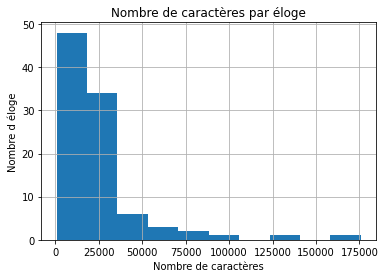

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

df['Eloge'].str.len().hist(ax = axes)
plt.title('Nombre de caractères par éloge')
plt.xlabel('Nombre de caractères')
plt.ylabel("Nombre d'éloges")

### Nombre de mots

Text(0, 0.5, "Nombre d'éloges")

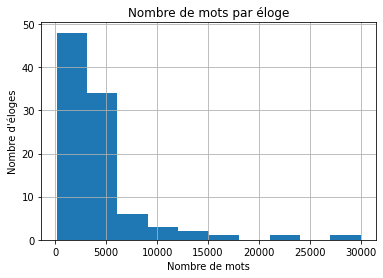

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

df['Eloge'].str.split().map(lambda x : len(x)).hist()

plt.title("Nombre de mots par éloge")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre d'éloges")

- Tokenize
- Remove stop-words
- Lemmatize or stemming
- Representation as vectors (Bag of words, TF-IDF, embeddings)



- Separate by century or significant period
- Topic modelling using LDA(Latent Dirichlet Allocation) : each document represented by a list of topics and each topic represented by a list of words
- WordCloud : size and color of each word that appears in the wordcloud indicates its frequency and importance
- Textblob : library where the sentiment function returns two properties : polarity 1 means positive statement, -1 negative one and subjectivity how someone's judgement is shaped by personal opinions and feelings
- Named entity recognition : text classified in pre-defined entities to get insights of the type of entities present in the data
- Part Of Speech : assigns nature des mots to words



https://www.linkedin.com/pulse/using-nlp-lda-map-evolution-neural-information-systems-roy-cfa